#Unsupervised Learning : K Means Clustering

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [5]:
df2=pd.read_csv(r"C:\Users\hp\repositories\Corizo\AI\Mall_Customers.csv")
df2

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
df2.isnull().sum()


CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df2.rename(
    columns={
        "CustomerID": "id",
        "Genre": "gender",
        "Age": "age",
        "Annual Income (k$)": "income",
        "Spending Score (1-100)": "score",
    },
    inplace=True,
)
df2


,id,gender,age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


Text(0, 0.5, 'Score')

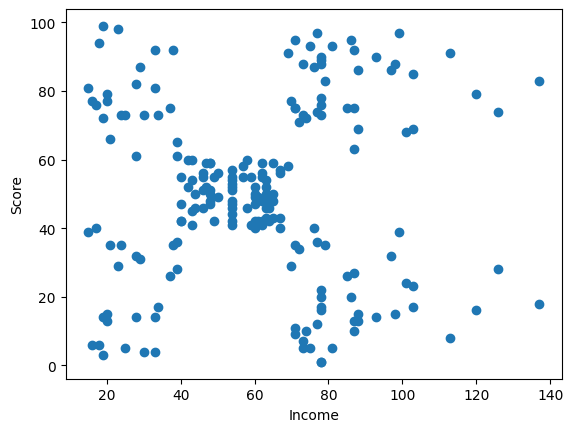

In [9]:
plt.scatter(df2["income"], df2["score"])
plt.xlabel("Income")
plt.ylabel("Score")


In [10]:
km = KMeans(n_clusters=5)
km.fit(df2[["income", "score"]])


KMeans(n_clusters=5)

In [11]:
km.cluster_centers_


array([[55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348]])

In [12]:
df2["Cluster_Group"] = km.labels_
df2


,id,gender,age,income,score,Cluster_Group
0,1,Male,19,15,39,4
1,2,Male,21,15,81,1
2,3,Female,20,16,6,4
3,4,Female,23,16,77,1
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,2
197,198,Male,32,126,74,3
198,199,Male,32,137,18,2


In [13]:
df2["Cluster_Group"].value_counts()


Cluster_Group
0    81
3    39
2    35
4    23
1    22
Name: count, dtype: int64

<Axes: xlabel='income', ylabel='score'>

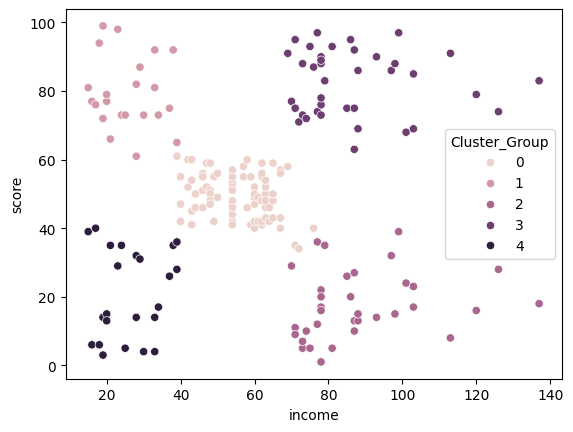

In [14]:
sns.scatterplot(x="income", y="score", hue="Cluster_Group", data=df2)


In [15]:
premium_users = df2[df2["Cluster_Group"] == 2]
premium_users


,id,gender,age,income,score,Cluster_Group
124,125,Female,23,70,29,2
128,129,Male,59,71,11,2
130,131,Male,47,71,9,2
134,135,Male,20,73,5,2
136,137,Female,44,73,7,2
138,139,Male,19,74,10,2
140,141,Female,57,75,5,2
144,145,Male,25,77,12,2
146,147,Male,48,77,36,2
148,149,Female,34,78,22,2
